In [1]:
import cv2
import numpy as np

# Đọc ảnh đầu vào
image = cv2.imread('/mnt/DataK/Project/ThyroidCancer/data/origin_data/B256/B2/z4907540008741_29ecba73d3d0cc14addd7cba092493d3.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Áp dụng Gaussian Blur để làm mờ ảnh
blur = cv2.GaussianBlur(gray, (25, 25), 0)

# Tạo một cửa sổ với tên "Detected Ellipses"
cv2.namedWindow("Detected Ellipses", cv2.WINDOW_NORMAL)

# Hiển thị ảnh kết quả
cv2.imshow("Detected Ellipses", blur)
cv2.waitKey(0)
cv2.destroyAllWindows()



qt.qpa.plugin: Could not find the Qt platform plugin "wayland" in "/home/harito/venv/py/lib/python3.11/site-packages/cv2/qt/plugins"


uint8 (768, 1024, 3) (0, 255)


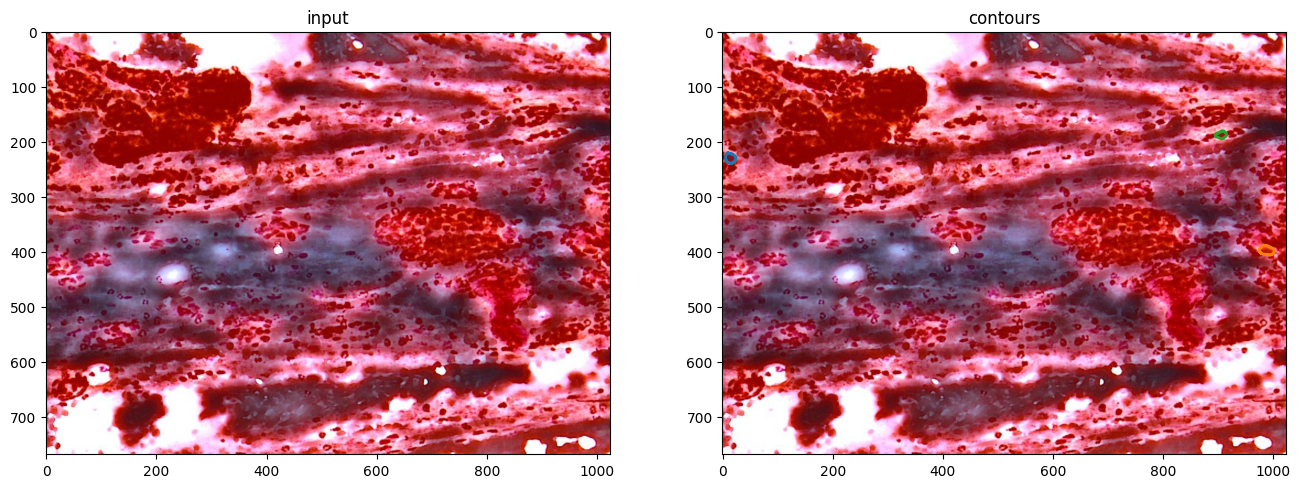

In [1]:
import torch, cv2, celldetection as cd
from matplotlib import pyplot as plt
# Load pretrained model
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = cd.fetch_model('ginoro_CpnResNeXt101UNet-fbe875f1a3e5ce2c', check_hash=True).to(device)
model.eval()
# Load input
img = cv2.imread('/mnt/DataK/Project/ThyroidCancer/data/origin_data/B256/B2/z4907540008741_29ecba73d3d0cc14addd7cba092493d3.jpg')
print(img.dtype, img.shape, (img.min(), img.max()))
# Run model
with torch.no_grad():
    x = cd.to_tensor(img, transpose=True, device=device, dtype=torch.float32)
    x = x / 255  # ensure 0..1 range
    x = x[None]  # add batch dimension: Tensor[3, h, w] -> Tensor[1, 3, h, w]
    y = model(x)
# Show results for each batch item
contours = y['contours']
for n in range(len(x)):
    cd.imshow_row(x[n], x[n], figsize=(16, 9), titles=('input', 'contours'))
    cd.plot_contours(contours[n])
    plt.show()

In [ ]:
import torch, cv2, celldetection as cd
from matplotlib import pyplot as plt
# Load pretrained model
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = cd.fetch_model('ginoro_CpnResNeXt101UNet-fbe875f1a3e5ce2c', check_hash=True).to(device)
model.eval()
# Load input
img = cv2.imread('/mnt/DataK/Project/ThyroidCancer/data/origin_data/B256/B6/Image_26389.jpg')
print(img.dtype, img.shape, (img.min(), img.max()))
# Run model
with torch.no_grad():
    x = cd.to_tensor(img, transpose=True, device=device, dtype=torch.float32)
    x = x / 255  # ensure 0..1 range
    x = x[None]  # add batch dimension: Tensor[3, h, w] -> Tensor[1, 3, h, w]
    y = model(x)
# Show results for each batch item
contours = y['contours']
for n in range(len(x)):
    cd.imshow_row(x[n], x[n], figsize=(16, 9), titles=('input', 'contours'))
    cd.plot_contours(contours[n])
    plt.show()

In [2]:
data = y['locations']   # tọa độ các điểm tâm 
len(data[0])

3